# Mental Health

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('training_.csv')

In [3]:
df_test = pd.read_csv('test.csv')

In [4]:
df_master = pd.concat([df_test,df_train],  axis = 0, ignore_index=True)

In [5]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.No                       1258 non-null   int64 
 1   Timestamp                  1258 non-null   object
 2   Age                        1258 non-null   int64 
 3   Gender                     1258 non-null   object
 4   Country                    1258 non-null   object
 5   state                      743 non-null    object
 6   self_employed              1240 non-null   object
 7   family_history             1258 non-null   object
 8   work_interfere             994 non-null    object
 9   no_employees               1258 non-null   object
 10  remote_work                1258 non-null   object
 11  tech_company               1258 non-null   object
 12  benefits                   1258 non-null   object
 13  care_options               1258 non-null   object
 14  wellness

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
pd.set_option('display.max_rows', None)

In [8]:
df_master.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,treatment
0,1,2014-08-29 11:32:22,39,Male,United Kingdom,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,Yes,These result may be a tad confusing so a summa...,NaN
1,2,2014-08-29 11:32:44,26,female,United States,WA,No,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes,I should note one of the places my employer fa...,NaN
2,3,2014-08-29 11:33:54,23,Female,United States,IL,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,No,No,NaN,NaN
3,4,2014-08-29 11:34:07,35,Male,Switzerland,NaN,No,Yes,Often,More than 1000,No,Yes,Don't know,Not sure,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,No,No,NaN,NaN
4,5,2014-08-29 11:36:38,36,Male,United States,FL,No,No,Never,1-5,Yes,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN,NaN


In [9]:
df_master.drop(['comments','Timestamp'], axis = 1, inplace= True)

# treatment

In [10]:
df_train['treatment'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
df_master['treatment'].unique()

array([nan, 'Yes', 'No'], dtype=object)

# Age

In [12]:
df_master['Age'].unique()

array([         39,          26,          23,          35,          36,
                42,          27,          33,          31,          28,
                29,          44,          25,          24,          34,
                48,          43,          41,          40,          37,
                32,          30,          38,          11,          45,
                50,          46,          20,          -1,          21,
                51,          72,          56,          60,          22,
                18,          19,         -29,          54,         329,
                55, 99999999999,          57,          58,          47,
                62,          65,          49,       -1726,           5,
                53,          61,           8], dtype=int64)

In [13]:
df_master['Age'].median()

31.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018DF8E8C400>]],
      dtype=object)

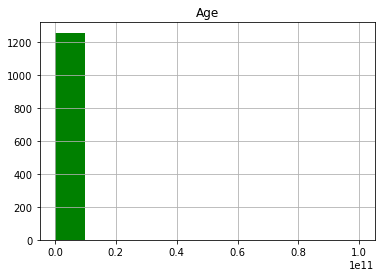

In [14]:
df_master.hist(column='Age',color = "green")

In [15]:
df_master['Age']=np.where(df_master['Age']> 70, 30 , df_master['Age'])

In [16]:
df_master['Age']=np.where(df_master['Age']< 15, 30 , df_master['Age'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018DF8F19430>]],
      dtype=object)

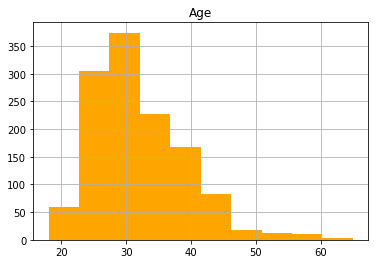

In [17]:
df_master.hist(column='Age',color = "orange")

In [18]:
a = list(np.arange(0,1,0.01))
print(np.quantile(df_master.Age , a),'\n')
print('total elements -->',len(a))

[18.   19.   21.   21.71 22.   23.   23.   23.   23.   24.   24.   24.
 24.   25.   25.   25.   25.   25.   26.   26.   26.   26.   26.   26.
 27.   27.   27.   27.   27.   28.   28.   28.   28.   28.   28.   29.
 29.   29.   29.   29.   29.   29.37 30.   30.   30.   30.   30.   31.
 31.   31.   31.   31.   31.   32.   32.   32.   32.   32.   32.   33.
 33.   33.   33.   33.   33.   34.   34.   34.   34.   34.   35.   35.
 35.   35.   36.   36.   36.   37.   37.   37.   37.   38.   38.   38.
 39.   39.   40.   40.   40.   41.   41.3  42.   43.   43.   44.   45.
 46.   48.   50.   55.43] 

total elements --> 100


In [19]:
# There are no outliers

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
df_master['Age'] = scaler.fit_transform(df_master['Age'].values.reshape(-1,1))

# Gender

In [22]:
df_master['Gender'].unique()

array(['Male', 'female', 'Female', 'M', 'male', 'Male ', 'm', 'p', 'F',
       'Woman', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means', 'f', 'Male-ish',
       'maile', 'Trans-female', 'Cis Female', 'something kinda male?',
       'Cis Male', 'Mal', 'Male (CIS)', 'queer/she/they', 'non-binary',
       'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)', 'queer',
       'Female (cis)', 'Mail', 'cis male', 'A little about you', 'Malr'],
      dtype=object)

In [23]:
df_master["Gender"] = df_master["Gender"].replace(to_replace=r'^[M|m|cis|Cis|Guy].*', value='male', regex=True)
df_master["Gender"] = df_master["Gender"].replace(to_replace=r'^[F|f|w|W].*', value='female', regex=True)
df_master["Gender"] = df_master["Gender"].replace(to_replace=r'^[q|A|GenderQueer|Neuter|Trans|Enby|ost|p].*', value='other', regex=True)

In [24]:
df_master['Gender'].unique()

array(['male', 'female', 'other'], dtype=object)

In [25]:
df_master['Gender'].value_counts()

male      996
female    248
other      14
Name: Gender, dtype: int64

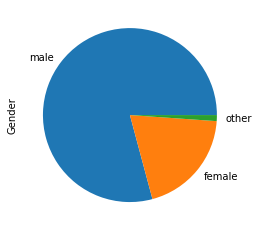

In [26]:
df_master['Gender'].value_counts().plot(kind = 'pie')

# Country

In [27]:
df_master['Country'].unique()

array(['United Kingdom', 'United States', 'Switzerland', 'Canada',
       'Germany', 'South Africa', 'Greece', 'Netherlands', 'France',
       'Australia', 'India', 'Croatia', 'New Zealand', 'Moldova',
       'Sweden', 'Belgium', 'Israel', 'Singapore', 'Poland', 'Colombia',
       'Georgia', 'China', 'Bulgaria', 'Italy', 'Ireland', 'Brazil',
       'Czech Republic', 'Philippines', 'Finland', 'Portugal', 'Russia',
       'Mexico', 'Slovenia', 'Costa Rica', 'Austria', 'Latvia', 'Romania',
       'Zimbabwe', 'Spain', 'Uruguay', 'Bosnia and Herzegovina',
       'Hungary', 'Japan', 'Nigeria', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The'], dtype=object)

In [28]:
df_master.drop(['Country'], axis = 1, inplace= True)

# state

In [29]:
df_master['state'].unique()

array([nan, 'WA', 'IL', 'FL', 'TN', 'CA', 'OR', 'NJ', 'UT', 'PA', 'IN',
       'OH', 'VA', 'TX', 'AL', 'WI', 'NY', 'SC', 'MN', 'VT', 'MI', 'NC',
       'OK', 'MD', 'CT', 'MA', 'IA', 'NM', 'MO', 'AZ', 'CO', 'GA', 'DC',
       'NE', 'WV', 'KS', 'NH', 'KY', 'NV', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

In [30]:
df_master['state'].isnull().sum()

515

In [31]:
df_master['state'].isnull().mean()*100

40.93799682034976

In [32]:
df_master['state'].value_counts()

CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
OR     29
PA     29
IL     28
IN     27
MI     22
MN     21
MA     20
FL     15
VA     14
NC     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      8
AZ      7
NJ      6
OK      6
SC      5
KY      5
IA      4
DC      4
CT      4
NV      3
KS      3
NH      3
VT      3
SD      3
NE      2
NM      2
WY      2
ME      1
ID      1
MS      1
LA      1
RI      1
WV      1
Name: state, dtype: int64

In [33]:
df_master['state'].mode()

0    CA
dtype: object

In [34]:
#drop

In [35]:
df_master.drop(['state'], axis = 1, inplace= True)

# self_employed

In [36]:
df_master['self_employed'].unique()

array(['Yes', 'No', nan], dtype=object)

In [37]:
df_master['self_employed'].value_counts()

No     1095
Yes     145
Name: self_employed, dtype: int64

In [38]:
df_master['self_employed'].isnull().sum()

18

In [39]:
df_master['self_employed'].dropna(how='all', inplace=True) 

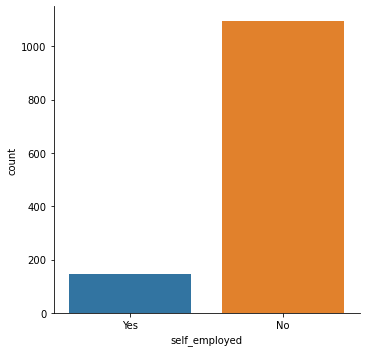

In [40]:
sns.factorplot('self_employed',data= df_master, kind='count')

# family_history  

In [41]:
df_master['family_history'].unique()

array(['Yes', 'No'], dtype=object)

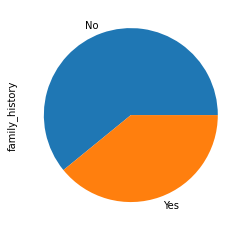

In [42]:
df_master['family_history'].value_counts().plot(kind = 'pie')

In [43]:
df_master['family_history'] = np.where(df_master['family_history'] == 'Yes', 1, 0)

# work_interfere

In [44]:
df_master['work_interfere'].unique()

array(['Sometimes', 'Often', 'Never', 'Rarely', nan], dtype=object)

In [45]:
df_master['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        143
Name: work_interfere, dtype: int64

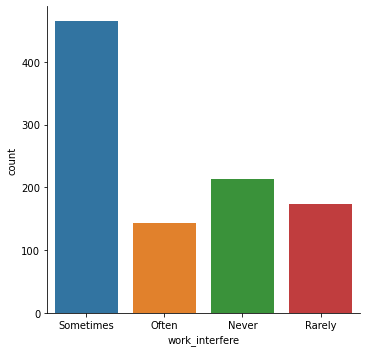

In [46]:
sns.factorplot('work_interfere',data=df_master,kind='count')

In [47]:
df_master['work_interfere'].mode()

0    Sometimes
dtype: object

In [48]:
df_master['work_interfere'].isnull().sum()

264

In [49]:
# give 1234 and show rows where work interfere is nan

In [50]:
df_master[df_master['work_interfere'].isnull()]

,S.No,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,treatment
20,21,0.340426,male,No,0,NaN,26-100,Yes,Yes,No,No,No,No,Don't know,Very difficult,Yes,Maybe,Some of them,No,No,Maybe,No,No,NaN
36,37,0.404255,male,No,0,NaN,6-25,No,Yes,Don't know,No,No,No,Yes,Very easy,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN
49,50,0.234043,male,No,0,NaN,More than 1000,No,No,Don't know,Not sure,Yes,Don't know,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
51,52,0.234043,male,No,0,NaN,6-25,Yes,Yes,Yes,Not sure,No,Yes,Don't know,Don't know,Maybe,No,Some of them,Yes,Maybe,Yes,Don't know,No,NaN
63,64,0.404255,male,No,0,NaN,6-25,Yes,Yes,No,Not sure,No,No,Don't know,Don't know,Maybe,No,Some of them,No,Maybe,Yes,Don't know,No,NaN
65,66,0.468085,male,No,0,NaN,More than 1000,No,No,Yes,Not sure,Don't know,Don't know,Don't know,Somewhat easy,Maybe,No,Some of them,Some of them,No,Maybe,Don't know,No,NaN
75,76,0.361702,male,No,0,NaN,6-25,No,Yes,Don't know,Not sure,Don't know,Don't know,Yes,Don't know,No,No,No,No,No,No,Yes,No,NaN
80,81,0.212766,male,No,0,NaN,More than 1000,No,No,Yes,No,No,No,Yes,Somewhat easy,Maybe,No,No,No,No,Yes,No,No,NaN
82,83,0.297872,male,No,0,NaN,26-100,No,Yes,No,No,No,No,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,Yes,NaN
88,89,0.489362,male,No,1,NaN,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,Maybe,Maybe,Some of them,Some of them,Maybe,Maybe,Don't know,No,NaN


In [51]:
df_master['work_interfere'] = df_master['work_interfere'].replace(np.nan, 'Sometimes')

In [52]:
df_master['work_interfere'].replace({'Never': 0, 'Rarely': 1, 'Sometimes':2, 'Often': 3 }, inplace= True)

# no_employees

In [53]:
df_master['no_employees'].unique()

array(['1-5', 'More than 1000', '26-100', '500-1000', '6-25', '100-500'],
      dtype=object)

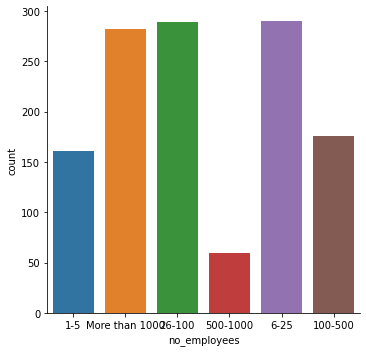

In [54]:
sns.factorplot('no_employees',data=df_master,kind='count')

# remote_work

In [55]:
df_master['remote_work'].value_counts()

No     883
Yes    375
Name: remote_work, dtype: int64

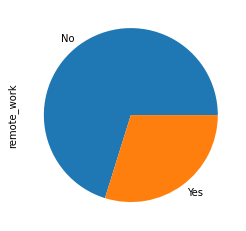

In [56]:
df_master['remote_work'].value_counts().plot(kind = 'pie')

In [57]:
df_master['remote_work'] = np.where(df_master['remote_work'] == 'Yes', 1, 0)

# tech_company

In [58]:
df_master['tech_company'].value_counts()

Yes    1031
No      227
Name: tech_company, dtype: int64

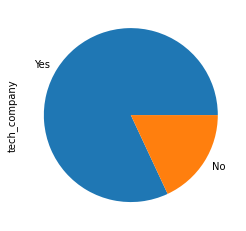

In [59]:
df_master['tech_company'].value_counts().plot(kind = 'pie')

In [60]:
df_master['tech_company'] = np.where(df_master['tech_company'] == 'Yes', 1, 0)

# benefits

In [61]:
df_master['benefits'].value_counts()

Yes           477
Don't know    408
No            373
Name: benefits, dtype: int64

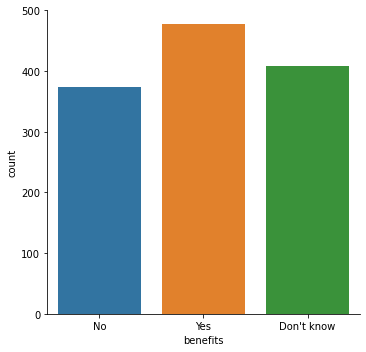

In [62]:
sns.factorplot('benefits',data=df_master,kind='count')

# care_options	

In [63]:
df_master['care_options'].value_counts()

No          501
Yes         443
Not sure    314
Name: care_options, dtype: int64

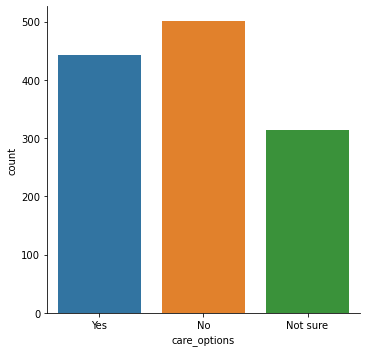

In [64]:
sns.factorplot('care_options',data=df_master,kind='count')

# wellness_program


In [65]:
df_master['wellness_program'].value_counts()

No            842
Yes           228
Don't know    188
Name: wellness_program, dtype: int64

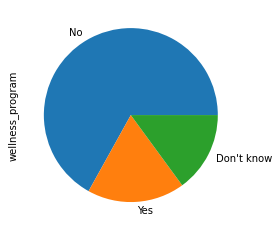

In [66]:
df_master['wellness_program'].value_counts().plot(kind = 'pie')

# seek_help

In [67]:
df_master['seek_help'].value_counts()

No            646
Don't know    363
Yes           249
Name: seek_help, dtype: int64

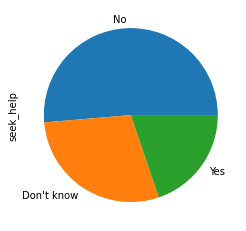

In [68]:
df_master['seek_help'].value_counts().plot(kind = 'pie')

# anonymity

In [69]:
df_master['anonymity'].value_counts()

Don't know    819
Yes           374
No             65
Name: anonymity, dtype: int64

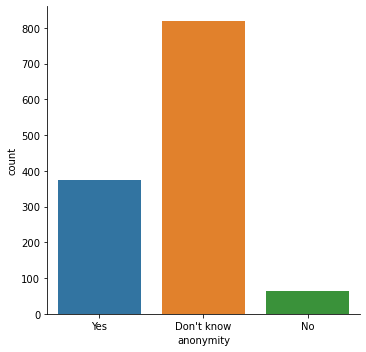

In [70]:
sns.factorplot('anonymity',data=df_master,kind='count')

# leave

In [71]:
df_master['leave'].value_counts()

Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         97
Name: leave, dtype: int64

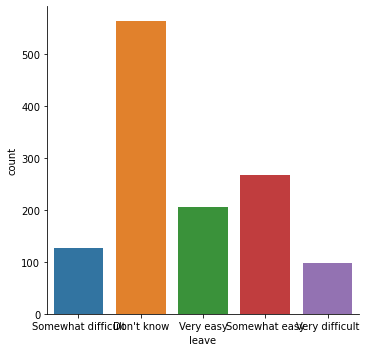

In [72]:
sns.factorplot('leave',data=df_master,kind='count')

In [73]:
df_master['leave'].replace({"Don't know": 0, 'Very easy': 1, 'Somewhat easy':2, 'Somewhat difficult': 3, 'Very difficult': 4 }, inplace= True)

# mental_health_consequence

In [74]:
df_master['mental_health_consequence'].value_counts()

No       489
Maybe    477
Yes      292
Name: mental_health_consequence, dtype: int64

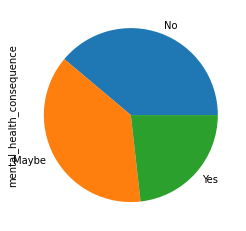

In [75]:
df_master['mental_health_consequence'].value_counts().plot(kind = 'pie')

# phys_health_consequence

In [76]:
df_master['phys_health_consequence'].value_counts()

No       924
Maybe    273
Yes       61
Name: phys_health_consequence, dtype: int64

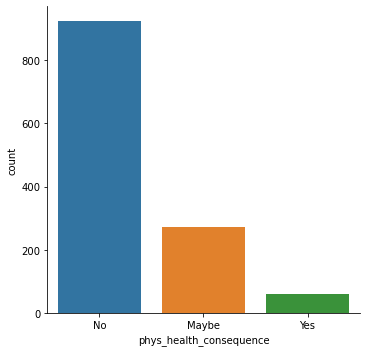

In [77]:
sns.factorplot('phys_health_consequence',data=df_master,kind='count')

# coworkers

In [78]:
df_master['coworkers'].value_counts()

Some of them    773
No              260
Yes             225
Name: coworkers, dtype: int64

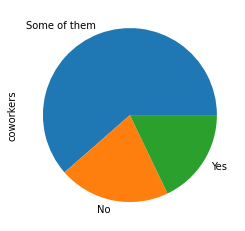

In [79]:
df_master['coworkers'].value_counts().plot(kind = 'pie')

# supervisor

In [80]:
df_master['supervisor'].value_counts()

Yes             516
No              393
Some of them    349
Name: supervisor, dtype: int64

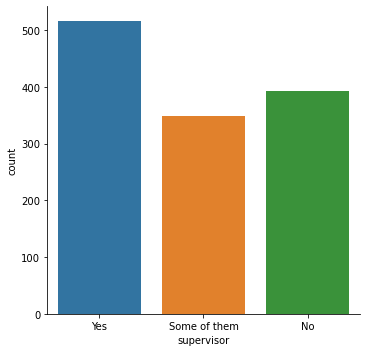

In [81]:
sns.factorplot('supervisor',data=df_master,kind='count')

# mental_health_interview

In [82]:
df_master['mental_health_interview'].value_counts()

No       1007
Maybe     207
Yes        44
Name: mental_health_interview, dtype: int64

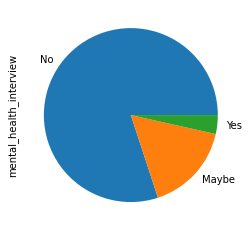

In [83]:
df_master['mental_health_interview'].value_counts().plot(kind = 'pie')

# phys_health_interview

In [84]:
df_master['phys_health_interview'].value_counts()

Maybe    557
No       499
Yes      202
Name: phys_health_interview, dtype: int64

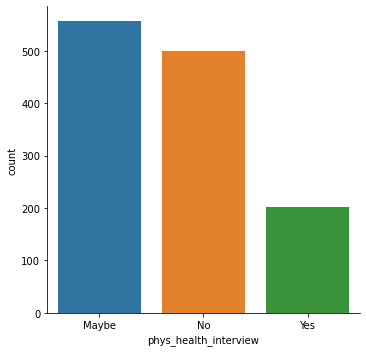

In [85]:
sns.factorplot('phys_health_interview',data=df_master,kind='count')

# mental_vs_physical

In [86]:
df_master['mental_vs_physical'].value_counts()

Don't know    576
Yes           342
No            340
Name: mental_vs_physical, dtype: int64

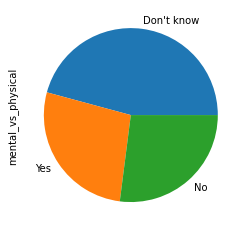

In [87]:
df_master['mental_vs_physical'].value_counts().plot(kind = 'pie')

# obs_consequence

In [88]:
df_master['obs_consequence'].value_counts()

No     1075
Yes     183
Name: obs_consequence, dtype: int64

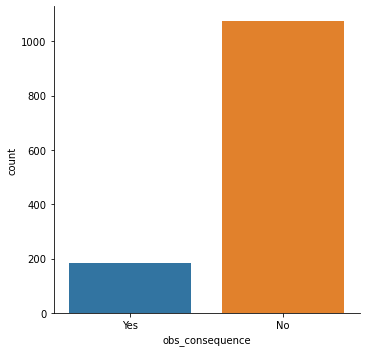

In [89]:
sns.factorplot('obs_consequence',data=df_master,kind='count')

# Model Building

In [90]:
train_data = df_master[df_master.treatment.notnull()]
test_data = df_master[df_master.treatment.isnull()]

In [91]:
train_data = pd.get_dummies(data = train_data , columns= ['Gender','treatment', 'no_employees', 'benefits', 'care_options',
        'wellness_program', 'seek_help', 'anonymity','self_employed',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'] ,drop_first= True)

In [92]:
train_data.head()

,S.No,Age,family_history,work_interfere,remote_work,tech_company,leave,Gender_male,Gender_other,treatment_Yes,no_employees_100-500,no_employees_26-100,no_employees_500-1000,no_employees_6-25,no_employees_More than 1000,benefits_No,benefits_Yes,care_options_Not sure,care_options_Yes,wellness_program_No,wellness_program_Yes,seek_help_No,seek_help_Yes,anonymity_No,anonymity_Yes,self_employed_Yes,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
210,1,0.404255,0,3,0,1,2,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0
211,2,0.553191,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
212,3,0.297872,0,1,0,1,3,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0
213,4,0.276596,1,3,0,1,3,1,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1
214,5,0.276596,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0


In [93]:
test_data = pd.get_dummies(data = test_data , columns= ['Gender','treatment', 'no_employees', 'benefits', 'care_options',
        'wellness_program', 'seek_help', 'anonymity','self_employed',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'] ,drop_first= True)

In [94]:
x = train_data.drop('treatment_Yes',axis=1)
y = train_data.treatment_Yes

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train ,x_test ,y_train ,y_test = train_test_split (x,y , test_size = 0.20, random_state = 4)

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [109]:
clf = RandomForestClassifier() # defining Classifier

param_dist = {
             "n_estimators": [150,275,425,516],
             'max_depth': [15,18,24,30]
             } #list of estimators i.e number of Tress to be Considered for Training

gs = GridSearchCV(clf, param_grid=param_dist, cv = 4)
gs.fit(x_train, y_train)
gs.best_params_

{'max_depth': 24, 'n_estimators': 516}

In [110]:
clf2 = RandomForestClassifier(max_depth=24,n_estimators=516)

In [111]:
rf_model= clf2.fit(x_train, y_train)

In [112]:
rf_predicted = clf2.predict(x_test)
rf_predicted 

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1], dtype=uint8)

In [113]:
from sklearn.metrics import f1_score

In [114]:
f1_score(y_test ,rf_predicted)

0.7474747474747474

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
accuracy_score(y_test, rf_predicted)

0.7619047619047619

In [ ]:
# import pickle

In [ ]:
# model = 'final.sav'

In [ ]:
# pickle.dump(rf_model , open(model,'wb'))

In [ ]:
# load_model = pickle.load(open(model ,'rb'))

In [ ]:
# test_pred= load_model.predict(test_data)
# test_pred

In [ ]:
# df = pd.DataFrame({'S.No':test_data['S.No'] , 'treatment':test_pred})

In [ ]:
# df

In [ ]:
# df['treatment'].replace({1:'Yes' , 0: 'No'}, inplace= True)

In [ ]:
# df

In [ ]:
# df.to_csv('test_pred.csv')